# Uvod
Ponekad imamo ograničenu količinu podataka iz prakse, te želimo interpolirajući njih moći predvidjeti ili aproksimirati nove podatke vezane uz taj fenomen. Ponekad možemo izračunati relativno mali broj podataka neke funkcije(ukoliko je ona teška za izračunati), pa iz njih želimo interpolirati i aproksimirati tu funkciju.

Jedan od načina interpolacije je pomoću polinoma, a konkretno ovaj rad će se baviti Newtonovom metodom interpolacije. Ona ima nekakve specifične prednosti nad Lagrangeovom što se tiče lakoće i brzine podizanja stupnja interpolacije, ali više o tome kasnije.

# Osnovni matematički problemi i kriteriji u teoriji aproksimacije
Bilo koja interpolacija, pa tako i polinomom, mora zadovoljiti određene kriterije aproksimacije.
1. Interpolacija<br>
U točkama po kojima interpoliramo - čvorovima, vrijednosti stvarne funkcije i aproksimacijske funkcije moraju se podudarati. Upravo ovo svojstvo će se koristiti za određivanje koeficijenata polinoma i/ili baze polinomijalnoga prostora.
2. Minimizacija pogreške<br>
$e(x) = f(x) - \varphi(x)$<br>
Sasvim je logično da bi aproksimacijska funkcija trebala što je više moguće prianjati stvarnoj funkciji. Stoga pokušavamo minimizirati **normu** pogreške. Najčešće norme koje se minimiziraju su 2-norma i $\infty$-norma. Posebno je popularna 2-norma, čija se aproksimacija zove srednjekvadratna, a konstruira se metodom najmanjih kvadrata. Ova norma je popularna zbog statističke analize - podaci koje imamo na raspolaganju se obično ponašaju kao normalna slučajna varijabla, s očekivanjem koje je točna vrijednost podatka, a varijanca(koju minimiziramo) su upravo kvadrati.<br>
<br>U slučaju $\infty$-norme pripadna se aproksimacija zove minimaks, no u to ne budem dalje ulazio u sklopu ovoga rada.

Ključni matematički problemi koje treba riješiti su:
* Egzistencija i jedinstvenost rješenja problema aproksimacije
* Analiza kvalitete dobivene aproksimacije - mjerenje norme pogreške
* Algoritamska implementacija matematičkoga modela
    * Algoritmi za konstrukciju interpolacijske/aproksimacijske funkcije
    * Algoritmi za vrednovanje interpolacijske/aproksimacijske funkcije nad novim x-evima čije pripadne funkcijske vrijednosti želimo interpolirati
* Vremenska i memorijska složenost algoritma, njegova efikasnost i točnost, te globalna i asimptotska konvergencija ukoliko je proces beskonačan
    
# Interpolacija polinomima
Kao već ranije spomenuto, interpolaciju polinomima možemo činiti na par načina koji se razlikuju većinom u složenosti. Za početak, interpoliramo na skupu podataka koji se sastoji od $(x, f(x))$ parova, gdje je bitno da su ta preslikavanja funkcije, tj. da jednom x-u ne može biti pridruženo više y-ona. Radi jednostavnosti ovim x-evima se često pridruže indexi na linearno rastući način(česta oznaka za indeks je k, pa tako imamo $(x_{k}, y_{k})$ parove, gdje su k indexi od 0 pa nadalje i pridruženi linearno x-evima(najmanjem x-u je pridružena 0, slijedećem većem 1, itd...)

Za ključni matematički problem egzistencije i jedinstvenosti interpolacijskog polinoma vrijedi slijedeći teorem, koji se oslanja na činjenicu da linearni sustav s regularnom matricom ima jedinstveno rješenje.

**Teorem**
Neka je $n \in \mathbb{N}_0$. Za zadane točke $(x_k, f_k), k = 0,...,n$, gdje je $x_i \not= x_j$ za $i \not= j$, postoji jedinstveni interpolacijski polinom stupnja najviše n


$\begin{equation}
\varphi(x) := p_{n}(x) = a_0 + a_{1}x + ... + a_{n}x^n
\end{equation}$

za koji vrijedi

$\begin{equation}
p_{n}(x_{k}) = f_{k}, k = 0,...,n.
\end{equation}$

Dokaz se može naći u literaturi, no ukratko on se svodi na rad sa Vandermondeovim determinantama. Ono što nas zanima je zapravo rješavanje linearnog sustava, pritom koristeći uvjet interpolacije:<br>
$
\begin{gather}
p_n(x_0) = a_0 + a_{1}x_0 + ... + a_{n}{x_{0}}^n = f_0\\
p_n(x_1) = a_0 + a_{1}x_1 + ... + a_{n}{x_{1}}^n = f_1\\
...\\
p_n(x_n) = a_n + a_{1}x_n + ... + a_{n}{x_{n}}^n = f_n\\
\end{gather}
$
<br>Ovo je sustav od (n + 1)-e linearne jednadžbe s (n + 1)-om nepoznanicom $a_0, a_1, ..., a_n$. Želimo provjeriti ima li on rješenje, te je li to rješenje jedinstveno. Zapravo treba provjeriti je i matrica regularna, a to se može napraviti računanjem determinante te matrice. Ta determinanta je upravo Vandermondeova determinanta.

Interpolacija samo funkcijskih vrijednosti se radi pomoću Lagrangeove ili Newtonove metode, no postoji i Hermiteova interpolacija koja može interpolirati i vrijednosti funkcije i njezine uzastopne derivacije.

## Problem interpolacije polinomima
Moramo pronaći polinom $p_n$ koji interpolira zadane funkcijske vrijednosti. Kao gore već navedeno, zapravo imamo sustav od (n + 1)-e nepoznanice, tj. (n + 1) podataka u potpunosti određuje (n + 1)-dimenzionalni vektorski prostor polinoma $\mathcal{P}_n$ stupnja manjeg ili jednakog n. Prema ranije navedenom teoremu postoji jedinstveni polinom $p_n$ koji interpolira zadane podatke. Ono što treba napraviti jeste izabrati polinomijalnu bazu $\{b_0, b_1, ..., b_n\}$ preko koje ćemo prikazati taj jedinstveni polinom $p_n$.

$
\begin{equation}
p_{n}(x) = \sum_{i=0}^{n}a_{i}b_{i}(x)
\end{equation}
$

Pomoću uvjeta interpolacije formiramo linearni sustav kojega rješavamo kako bismo dobili koeficijente $a_i$.

$
\begin{equation}
p_{n}(x) = \sum_{i=0}^{n}a_{i}b_{i}(x) = f_k, k = 0,...,n
\end{equation}
$

Interpolacija polinomima se generalno sastoji od 2 faze:
1. Konstrukcija i dobivanje polinoma $p_n$
2. Izvrednjavanje gore-dobivenoga polinoma $p_n$ u svrhu interpolacije

Ovisno o tome kakvu bazu odaberemo, dobivanje polinoma $p_n$ će predstavljati jedan od 3 slučaja/pristupa:
1. "Jednostavna baza, komplicirani koeficijenti"<br>
U ovom pristupu fiksiramo jednostavnu bazu u $\mathcal{P}_n$, sasvim neovisno o podacima. Zatim na temelju podataka računamo koeficijente $a_i$, stoga sva ovisnost o podacima ulazi upravo u koeficijente. Zbog toga je prva faza spora, a druga faza veoma brza
2. "Jednostavni koeficijenti, komplicirana baza"<br>
Ovaj pristup se temelji na tome da podijelimo ovisnost o zadanim podacima tako da koeficijenti jednostavno ovise o zadanim podacima i lako se računaju(npr. da su jednaki $f_k$), no baza u tom slučaju komplicirano ovisi o interpolacijskim čvorovima. Zbog toga razloga je prva faza brza, ali druga faza je spora jer je potrebno konstantno re-evaluirati i računati $b_{i}(x)$.
3. Kompromisni pristup<br>
Pokušava se postići jednostavna ovisnost baze o čvorovima, no istovremeno i koeficijenti mogu ovisiti o svim zadanim podacima. Na taj način se pokušava postići balans između 2 faze i relativno jednostavni algoritmi u obje faze
    
Pogledajmo složenosti svakog pristupa, a odatle ćemo i shvatiti zašto je Newtonova polinomijalna interpolacija puno bolja i lakša od Lagrangeove. Lagrangeova polinomijalna interpolacija se često koristi u teoriji, za prikaz i dokazivanje polinomijalne interpolacije, a Newtonova polinomijalna interpolacija je zapravo primjerenija za korištenje u praksi, te je nekakva vrsta "upgradea" nad Lagrangeovom polinomijalnom interpolacijom.

1. Složenost prvog pristupa<br>
Najskuplja prva faza ima složenost $O(n^3)$. Pošto baza uopće ne ovisi o čvorovima, ovaj sustav može biti vrlo nestabilan.
No vrednovanje polinoma je relativno jednostavno, sa složenošću $O(n)$, pošto samo defakto radimo množenje i sumiranje sa unaprijed izračunatim koeficijentima i odabranom bazom.
2. Složenost drugog pristupa<br>
Prva faza je relativno jednostavna sa složenošću $O(n)$, gdje defakto samo iščitavamo rješenje iz dijagonalnog linearnog sustava.
Druga faza, tj. izvrednjavanje polinoma je zato sporo, pošto svi polinomi baze imaju puni stupanj n. Primjer ovakve baze je Lagrangeova baza.
3. Složenost trećeg pristupa<br>
U ovom pristupu baza se izabire tako da se dobije donjetrokutasti linearni sustav, čije rješavanje zahtijeva $O(n^2)$ operacija. Ovo je takozvana Newtonova baza, i kod nje stupnjevi polinoma $b_i$ rastu($deg\ b_i = i$).
U drugoj fazi, izbor ovakve baze vodi na jednostavnu linearnu rekurziju što omogućuje linearnu složenost izvrednjavanja. Newtonova polinomijalna interpolacija je jednostavna, skalabilna(lagano je dodati nove interpolacijske čvorove bez potrebe za računanjem cijeloga $p_n$ iz početka) i stabilna pošto i baza i koeficijenti polinoma ovise o ulaznim podacima.

Prije nego krenem na Newtonovu metodu interpolacije, htio bih još spomenuti takozvanu standardnu bazu, koja bi se koristila na primjer u prvome pristupu.

$
\begin{equation}
b_i = x^i, i \in [0,n]
\end{equation}
$

# Newtonova metoda interpolacije
Kao već ranije navedeno, Lagrangeov oblik interpolacijskoga polinoma se koristi samo u teoretske svrhe, jer je nezgodno dodavanje novih interpolacijskih čvorova. Ukoliko želimo povećati stupanj polinoma u svrhu poboljšavanja aproksimacije i minimiziranja pogreške, morali bismo dodati još interpolacijskih čvorova. No, u tom slučaju bismo morali interpolacijski polinom $p_n$ izračunati iz početka, jednostavno zbog formula i pristupa Lagrangeove interpolacije.

Newtonova polinomijalna interpolacija pokušava riješiti ove probleme. Neka je $p_{n-1}$ interpolacijski polinom koji interpolira funkciju f u točkama $x_k, k = 0,...,n-1$. Želimo dodati još jedan interpolacijski čvor(bez ponovnog računanja cijelog polinoma $p_n$) u svrhu dobivanja (kvalitetnijeg?)polinoma $p_n$, koji interpolira funkciju f još i u točki $x_n$.

$
\begin{equation}
p_n(x) = p_{n-1}(x) + c(x)
\end{equation}
$

$c(x)$ je korekcija, polinom stupnja n. Također mora vrijediti:<br>
$
\begin{equation}
c(x_k) = p_{n}(x_k) - p_{n-1}(x_k) = f(x_k) - f(x_k) = 0, k = 0,..., n-1.\text{ $x_k$ su interpolacijski čvorovi}
\end{equation}
$

Zbog ovoga razloga interpolacijski čvorovi(bez zadnjega, tj. $x_n$) su nultočke polinoma c, te stoga c će biti oblika:<br>
$
\begin{equation}
c(x_k) = a_{n}(x-x_0)\cdots(x-x_{n-1})
\end{equation}
$

Uvjet interpolacije za zadnju točku $x_n$ kaže da mora vrijediti $p_n(x_n) = f(x_n)$, dakle vrijedi:<br>
$
\begin{align}
\begin{split}
f(x_n) &= p_n(x_n) = p_{n-1}(x_n) + c(x_n) \\ &= p_{n-1}(x_n) + a_n(x_{n}-x_0)\cdots(x_{n}-x_{n-1}),
\end{split}
\\ a_n = \frac{f(x_n)-p_{n-1}(x_n)}{(x_n-x_0)\cdots(x_n-x_{n-1})} = \frac{f(x_n)-p_{n-1}(x_n)}{\omega(x_n)}
\end{align}
$

Koeficijent $a_n$ je dakle funkcija interpolacijskih čvorova i zvati ćemo ga n-ta podijeljena razlika, a to ćemo označavati sa:
$
\begin{equation}
a_n = f[x_0,x_1,...,x_n]
\end{equation}
$

Rekurzivna formula za dobivanje polinoma stupnja većega od trenutnog:
$
\begin{equation}
p_n(x) = p_{n-1}(x) + (x-x_0)\cdots(x-x_{n-1})f[x_0,x_1,...,x_n]
\end{equation}
$

Upravo to svojstvo je korisno za skalabilnost, tj. lagano povećavanje stupnja polinoma radi bolje aproksimacije i minimizacije pogreške(iako bitno je zapamtiti da ne mora značiti što je stupanj polinoma veći da je i aproksimacija bolja - neke aproksimacijske funkcije ne konvergiraju prema stvarnoj funkciji, ali više o tome na kraju).

Ukoliko se vratimo na Lagrangeov oblik, možemo $a_n$, tj. $f[x_0,x_1,...,x_n]$(n-ta podijeljena razlika) prikazati pomoću još jedne formule:<br>
$
\begin{equation}
f[x_0,x_1,...,x_n] = \sum_{k=0}^{n}\frac{f(x_k)}{\omega'(x_k)}
\end{equation}
$

# Lagrangeov oblik interpolacijskog polinoma
Gornja formula podijeljenih razlika oslanja se na formule i neka svojstva Lagrangeovog interpolacijskog polinoma, pa ću ih ovdje prikazati:<br>
$
\begin{gather}
\omega(x) = \prod_{i=0}^{n}(x-x_i)\\
\omega_k(x) = \prod_{i=0\\ i \not= k}^{n}(x-x_i)\\
ℓ_k(x) = \frac{\omega(x)}{(x-x_k)\omega_k(x_k)}\\
\omega_k(x_k) = \omega'(x_k)\\
p_n(x) = \omega(x)\sum_{k=0}^{n}\frac{f_k}{(x-x_k)\omega'(x_k)}
\end{gather}
$

Formula iznad se može koristiti za računanje vrijednosti aproksimacijskog Lagrangeovog polinoma za $x \not= x_k, k = 0,...,n$. Bitno je uočiti da za svaki novi x se računa $\omega(x)$ i $(x-x_k)$, dok se $\omega_k(x_k) = \omega'(x_k)$ može sačuvati i zapamtiti u nekakvoj priručnoj podatkovnoj strukturi, jer ne ovisi o x, već ju je potrebno samo za svaki interpolacijski čvor jedanput izračunati.

# Još o Newtonovom interpolacijskom polinomu
Pomoću relacije iznad naslova "Lagrangeov oblik interpolacijskog polinoma"(Jupyter notebook trenutno ne podržava equation labele i reference) mogu se izraziti određena svojstva podijeljenih razlika koja se koriste za lakšu i efikasniju implementaciju algoritma:<br>
$
\begin{equation}
f[x_0,x_1,...,x_n] = \frac{f[x_1,...,x_n] - f[x_0,x_1,...,x_{n-1}]}{x_n - x_0}\\
\text{Dokaz preskačem, prisutan je u literaturi}
\end{equation}
$

Neki autori baš tu rekurzivnu formulu koriste kao definiciju podijeljenih razlika. Pošto ćemo Newtonove interpolacijske polinome računati rekurzivno, potrebno je postaviti početni uvjet. Konstanta koja prolazi točkom $(x_0, f(x_0))$ je interpolacijski polinom stupnja 0 pa zato postavljamo $a_0=f[x_0]=f(x_0)$. Zapravo vrijedi općenito $f[x_k] = f(x_k)$. Nakon raspisivanja rekurzivne formule za računanje Newtonovog interpolacijskog polinoma, dobije se slijedeći generalni oblik:<br>
$
\begin{equation}
p_n(x) = f[x_0] + (x-x_0)f[x_0, x_1] + (x-x_0)(x-x_1)f[x_0, x_1, x_2] + \cdots + (x-x_0)\cdots(x-x_{n-1})f[x_0,x_1,...,x_n]
\end{equation}
$

Prilikom računanja koeficijenata polinoma koristiti ćemo 1D polje za pohranu podijeljenih razlika - na mjestu i nalaziti će se podijeljena razlika $f[x_0,x_1,...x_i]$. Samo izvrednjavanje Newtonovog interpolacijskog polinoma u točki x se radi na sličan način kao Hornerova shema. Bitno je za naglasiti da je dodavanje dodatnoga interpolacijskoga čvora veoma lagano pošto se radi o rekurzivnoj relaciji. Dodajmo $x_{n+1}$:<br>
$
\begin{equation}
p_{n+1}(x) = p_{n}(x) + (x-x_0)\cdots(x-x_n)f[x_0,x_1,...,x_n, x_{n+1}]
\end{equation}
$

# Ocjena pogreške Newtonovog interpolacijskog polinoma
Greška je ista kao i kod Lagrangeovog interpolacijskog polinoma. Dodatno, može se prikazati i pomoću podijeljenih razlika.<br>
$
\begin{gather}
f(x_{n+1}) - p_{n}(x_{n+1}) = \frac{\omega(x_{n+1})}{(n+1)!}f^{(n+1)}(\xi)\\
f[x_0,x_1,...,x_n,x] = \frac{f^{(n+1)}(\xi)}{(n+1)!}\\
\text{za neki $\xi \in I$}
\end{gather}
$




# Prikaz rada algoritma na nekim podatkovnim setovima
Za podatkovni set odlučio sam se na jedan set podataka iz 20. stoljeća. Oni prikazuju povezanost vrelišta vode i atmosferskog tlaka. Njih su izmjerili škotski fizičar James Forbes na raznim lokacijama u Škotskoj i Alpama, te dr. Joseph Hooker koji je svoje podatke izmjerio na Himalajama.

Izmjereni su pedesetih godina 20. stoljeća, a sa svrhom razvoja jednostavne metode određivanja nadmorske visine planina. Na x osi je temperatura vrelišta, a na y osi atmosferski tlak.

# Zaključak i završne napomene
Za zaključiti, polinomijalna interpolacija je već relativno staro te teoretski istraženo i dokazano područje. Lagrangeova polinomijalna interpolacija se koristi u teoretske i akademske svrhe, a Newtonova je prilagođenija upotrebi u praksi. U praksi se ne koriste polinomi visokoga stupnja, nego negdje maksimalno do stupnja 5, zbog toga što greška krene previše rasti. Runge je već na jednostavnoj funkciji pokazao da aproksimativni polinomi ne moraju konvergirati prema točnoj pozadinskoj funkciji. Ovom problemu se može pribjeći egzotičnim odabirom točaka mreže na x-osi, no postoji egzistencijalni teorem koji ne garantira da za svaku funkciju postoji odabir točaka koji bi osigurao konvergenciju polinomijalnom aproksimacijom.

Stoga se često funkcije aproksimiraju polinomijalno po dijelovima, i to u relativno niskim ali fiksnim polinomijalnim stupnjevima, ili se istražuju nove metode aproksimacije(npr. racionalna aproksimacija). Kao već ranije rečeno, određeni problemi mogu se zaobići na primjer odabirom Čebiševljeve mreže umjesto ekvidistantne mreže(nekim funkcijama se povećava greška, pogotovo na rubovima). Glavni aspekti funkcija koji mogu uzrokovati probleme pri polinomijalnoj aproksimaciji su:
* "Loš" odabir mreže polinomijalnih čvorova interpolacije
* Funkcija nije glatka ili neprekidna

U narednom dijelu ću prikazati rad algoritma na podatkovnom hooker-forbes setu. Problem sa tim setom je to što je polinom 48. stupnja - što je previsoki stupanj pa je stoga i aproksimacija relativno loša. No za početak ću pokazati aproksimaciju polinomom na primjeru tangens funkcije pomoću polinoma 5. stupnja koja izgleda dosta fino.

Kod koji slijedi obavlja samo setup, te potrebne pripreme. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np

f_arr = []
data = []  # Array of (x, y) tuples
x_values = []
y_values = []
EPSILON = 1E-6


def clear_data_structs():
    f_arr.clear()
    data.clear()
    x_values.clear()
    y_values.clear()

    
def fill_f_arr():
    global f_arr
    n = len(data)

    # Prvo popuniti sa pocetnim vrijednostima - f[xk] = f(xk)
    for i in range(n):
        f_arr.append(y_values[i])

    # Sada izracunati konkretne brojeve
    for i in range(1, n):
        for j in reversed(range(i, n)):
            denom = (x_values[j] - x_values[j-i])

            if abs(denom) <= EPSILON:
                # Ne mozemo dijeliti s 0 pa cemo to zanemariti
                continue
            else:
                f_arr[j] = (f_arr[j] - f_arr[j - 1])/denom

    # Isprintati sto smo dobili
    print(f"Izracunati f_arr: {f_arr}")


def fill_data_generic(file_name):
    global data, x_values, y_values

    for line in open("data/" + file_name):
        parts = line.split()
        x = float(eval(parts[0]))
        y = float(eval(parts[1]))
        data.append((x, y))

    # Sortirati po x-ovima uzlazno
    data = sorted(data, key=lambda tuple_in: tuple_in[0])
    for (x, y) in data:
        x_values.append(x)
        y_values.append(y)


def fill_data_hooker_forbes():
    """
    Ovi podaci predstavljaju povezanost vrelišta vode i atmosferskog tlaka.
    Njih su prošloga stoljeća izmjerili škotski fizičar James Forbes na raznim lokacijama
    u Škotskoj i Alpama, te dr. Joseph Hooker koji je svoje podatke izmjerio na Himalajama.

    Izmjereni su pedesetih godina 20. stoljeća, a sa svrhom razvoja jednostavne metode
    određivanja nadmorske visine planine.

    Na x osi je temperatura vrelišta, a na y osi atmosferski tlak.
    :return: None
    """
    global data, x_values, y_values

    for line in open("data/forbes.dat"):
        parts = line.split()
        x = float(parts[1])
        y = float(parts[0])
        data.append((x, y))

    for line in open("data/hooker.dat"):
        parts = line.split()
        x = float(parts[1])
        y = float(parts[0])
        data.append((x, y))

    # Sortirati po x-ovima uzlazno
    data = sorted(data, key=lambda tuple_in: tuple_in[0])
    for (x, y) in data:
        x_values.append(x)
        y_values.append(y)


def algoritam_vrednovanja(x):
    """
    Veoma slicno Hornerovoj shemi
    :return: vrijednost polinoma pn(x)
    """
    n = len(data)
    to_ret_sum = f_arr[n - 1]

    for i in reversed(range(n - 1)):
        to_ret_sum = to_ret_sum * (x - x_values[i]) + f_arr[i]

    return to_ret_sum

Vrijeme za aproksimaciju tangens funkcije:

Pročitani podaci: [(-1.5, -14.1014), (-0.75, -0.931596), (0.0, 0.0), (0.75, 0.931596), (1.5, 14.1014)]
Izracunati f_arr: [-14.1014, 17.559738666666664, -10.878407111111109, 4.834847604938271, 0.0]


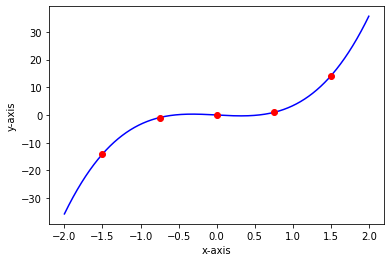

In [2]:
# Pocistiti podatkovne strukture
clear_data_structs()

def approximate_tan():
    fill_data_generic("tan_example_1.dat")
    print(f"Pročitani podaci: {data}")
    fill_f_arr()
    
    t = np.arange(-2, 2, 1E-3)
    t_y = []
    
    for t_x in t:
        res = algoritam_vrednovanja(t_x)
        t_y.append(res)
        
    # Sada ih treba nacrtati
    plt.ylabel("y-axis")
    plt.xlabel("x-axis")
    plt.plot(t, t_y, "b-", x_values, y_values, 'ro')
    plt.show()
    
approximate_tan()
    

A sada isprobati i 48-podatkovni set aproksimirati polinomom odjedanput!

Pročitani podaci: [(15.376, 180.6), (15.919, 181.0), (15.928, 181.9), (16.106, 181.9), (16.235, 182.4), (16.385, 183.2), (16.817, 184.1), (16.881, 184.6), (16.959, 184.1), (17.062, 185.6), (17.221, 186.0), (17.267, 185.7), (18.356, 188.8), (18.507, 188.5), (18.869, 189.5), (19.386, 190.6), (19.49, 191.1), (19.758, 191.4), (20.212, 193.6), (20.48, 193.4), (20.79, 194.5), (20.79, 194.3), (21.605, 195.6), (21.654, 196.3), (21.892, 197.0), (21.928, 196.4), (22.4, 197.9), (22.67, 198.4), (23.03, 199.5), (23.15, 199.4), (23.35, 199.9), (23.369, 200.1), (23.726, 200.6), (23.89, 200.9), (23.99, 201.1), (24.01, 201.3), (24.02, 201.4), (24.697, 202.5), (25.14, 203.6), (26.57, 204.6), (27.76, 208.6), (27.972, 208.4), (28.49, 209.5), (28.559, 210.2), (29.04, 210.7), (29.211, 210.8), (29.88, 211.9), (30.06, 212.2)]
Izracunati f_arr: [180.6, 0.7366482504604143, 179.82491258973945, -978.8825628472426, 3156.126325548382, -6846.495849373355, 7651.563813496653, -7932.596693277074, 7334.358655686255, -47

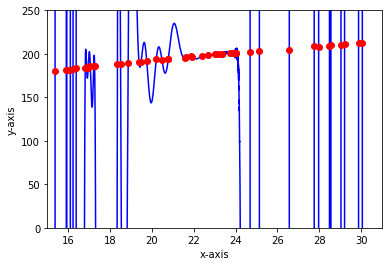

In [3]:
# Uvijek na pocetku za svaki slucaj pocistiti podatkovne strukture
clear_data_structs()

def approximate_forbes_hooker():
    fill_data_hooker_forbes()
    print(f"Pročitani podaci: {data}")
    
    fill_f_arr()
    
    t = np.arange(15, 31, 1E-3)
    t_y = []

    for t_x in t:
        res = algoritam_vrednovanja(t_x)
        t_y.append(res)

    # Sada ih treba nacrtati
    plt.ylabel("y-axis")
    plt.xlabel("x-axis")
    plt.plot(t, t_y, "b-", x_values, y_values, 'ro')
    plt.axis([15, 31, 0, 250])
    plt.show()
    
approximate_forbes_hooker()

Problemi su vjerojatno previsoki stupanj aproksimacije, te to što funkcija nije glatka.

Ručno sam odabrao 10 podataka iz ta 2 podatkovna seta i njih aproksimirao:

Pročitani podaci: [(15.376, 180.6), (16.959, 184.1), (18.507, 188.5), (20.212, 193.6), (23.726, 200.6), (25.14, 203.6), (27.972, 208.4), (28.49, 209.5), (29.211, 210.8), (30.06, 212.2)]
Izracunati f_arr: [180.6, 2.210991787744788, 0.20165617158643376, -0.03223864114689617, -0.00033696217649869246, 0.0008842983200329745, -0.0001674662369540537, 2.945776606950656e-05, -6.2074583649632124e-06, 1.540262576947994e-06]


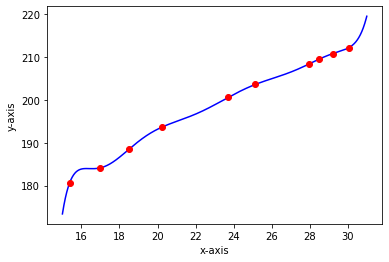

In [4]:
# Pocistiti podatkovne strukture
clear_data_structs()

def approximate_cherry_picked_FH():
    fill_data_generic("forbes_hooker_example_1.dat")
    print(f"Pročitani podaci: {data}")
    fill_f_arr()
    
    t = np.arange(15, 31, 1E-3)
    t_y = []
    
    for t_x in t:
        res = algoritam_vrednovanja(t_x)
        t_y.append(res)
        
    # Sada ih treba nacrtati
    plt.ylabel("y-axis")
    plt.xlabel("x-axis")
    plt.plot(t, t_y, "b-", x_values, y_values, 'ro')
    plt.show()
    
approximate_cherry_picked_FH()

Slijedeći bi korak bio dodavanje polinomne interpolacije po dijelovima funkcije, sa niskim ali fiksnim stupnjem polinoma. Da imam više vremena dodao bih to i još primjera, ali eto nažalost nemam.